In [1]:
source('../src/load_data.r')
source('../src/multiplot.r')

In [2]:
dim(housing_df)

[1] 1451   80

In [3]:
head(housing_df)

MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
60,RL,65,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,without,without,without,0,2,2008,WD,Normal,208500
20,RL,80,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,⋯,0,without,without,without,0,5,2007,WD,Normal,181500
60,RL,68,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,without,without,without,0,9,2008,WD,Normal,223500
70,RL,60,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,⋯,0,without,without,without,0,2,2006,WD,Abnorml,140000
60,RL,84,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,⋯,0,without,without,without,0,12,2008,WD,Normal,250000
50,RL,85,14115,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,⋯,0,without,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [4]:
count_empty_total()

In [5]:
numeric_features = colnames(Filter(is.numeric, housing_df))
numeric_features

[1] "LotFrontage"   "LotArea"       "YearBuilt"     "YearRemodAdd" 
 [5] "MasVnrArea"    "BsmtFinSF1"    "BsmtFinSF2"    "BsmtUnfSF"    
 [9] "TotalBsmtSF"   "FirstFlrSF"    "SecondFlrSF"   "LowQualFinSF" 
[13] "GrLivArea"     "GarageYrBlt"   "GarageArea"    "WoodDeckSF"   
[17] "OpenPorchSF"   "EnclosedPorch" "ThreeSsnPorch" "ScreenPorch"  
[21] "PoolArea"      "MiscVal"       "YrSold"        "SalePrice"

In [6]:
factor_features = colnames(Filter(is.factor, housing_df))
factor_features

[1] "MSSubClass"    "MSZoning"      "LotShape"      "LandContour"  
 [5] "Utilities"     "LotConfig"     "LandSlope"     "Neighborhood" 
 [9] "Condition1"    "Condition2"    "BldgType"      "HouseStyle"   
[13] "Street"        "Alley"         "OverallQual"   "OverallCond"  
[17] "RoofStyle"     "RoofMatl"      "Exterior1st"   "Exterior2nd"  
[21] "MasVnrType"    "ExterQual"     "ExterCond"     "Foundation"   
[25] "BsmtQual"      "BsmtCond"      "BsmtExposure"  "BsmtFinType1" 
[29] "BsmtFinType2"  "Heating"       "HeatingQC"     "CentralAir"   
[33] "Electrical"    "BsmtFullBath"  "BsmtHalfBath"  "FullBath"     
[37] "HalfBath"      "BedroomAbvGr"  "KitchenAbvGr"  "KitchenQual"  
[41] "TotRmsAbvGrd"  "Functional"    "Fireplaces"    "FireplaceQu"  
[45] "GarageType"    "GarageFinish"  "GarageCars"    "GarageQual"   
[49] "GarageCond"    "PavedDrive"    "PoolQC"        "Fence"        
[53] "MiscFeature"   "MoSold"        "SaleType"      "SaleCondition"

In [7]:
attach(housing_df)

# Analysis of Variance (ANOVA)

Analysis of Variance (ANOVA) is a statistical procedure for comparing means of two or more populations. 

ANOVA is a method for studying differences in means by analysis of the variance components in the model. 

### One-way ANOVA

One-way ANOVA handles a special case of this problem, testing for equal group means. 

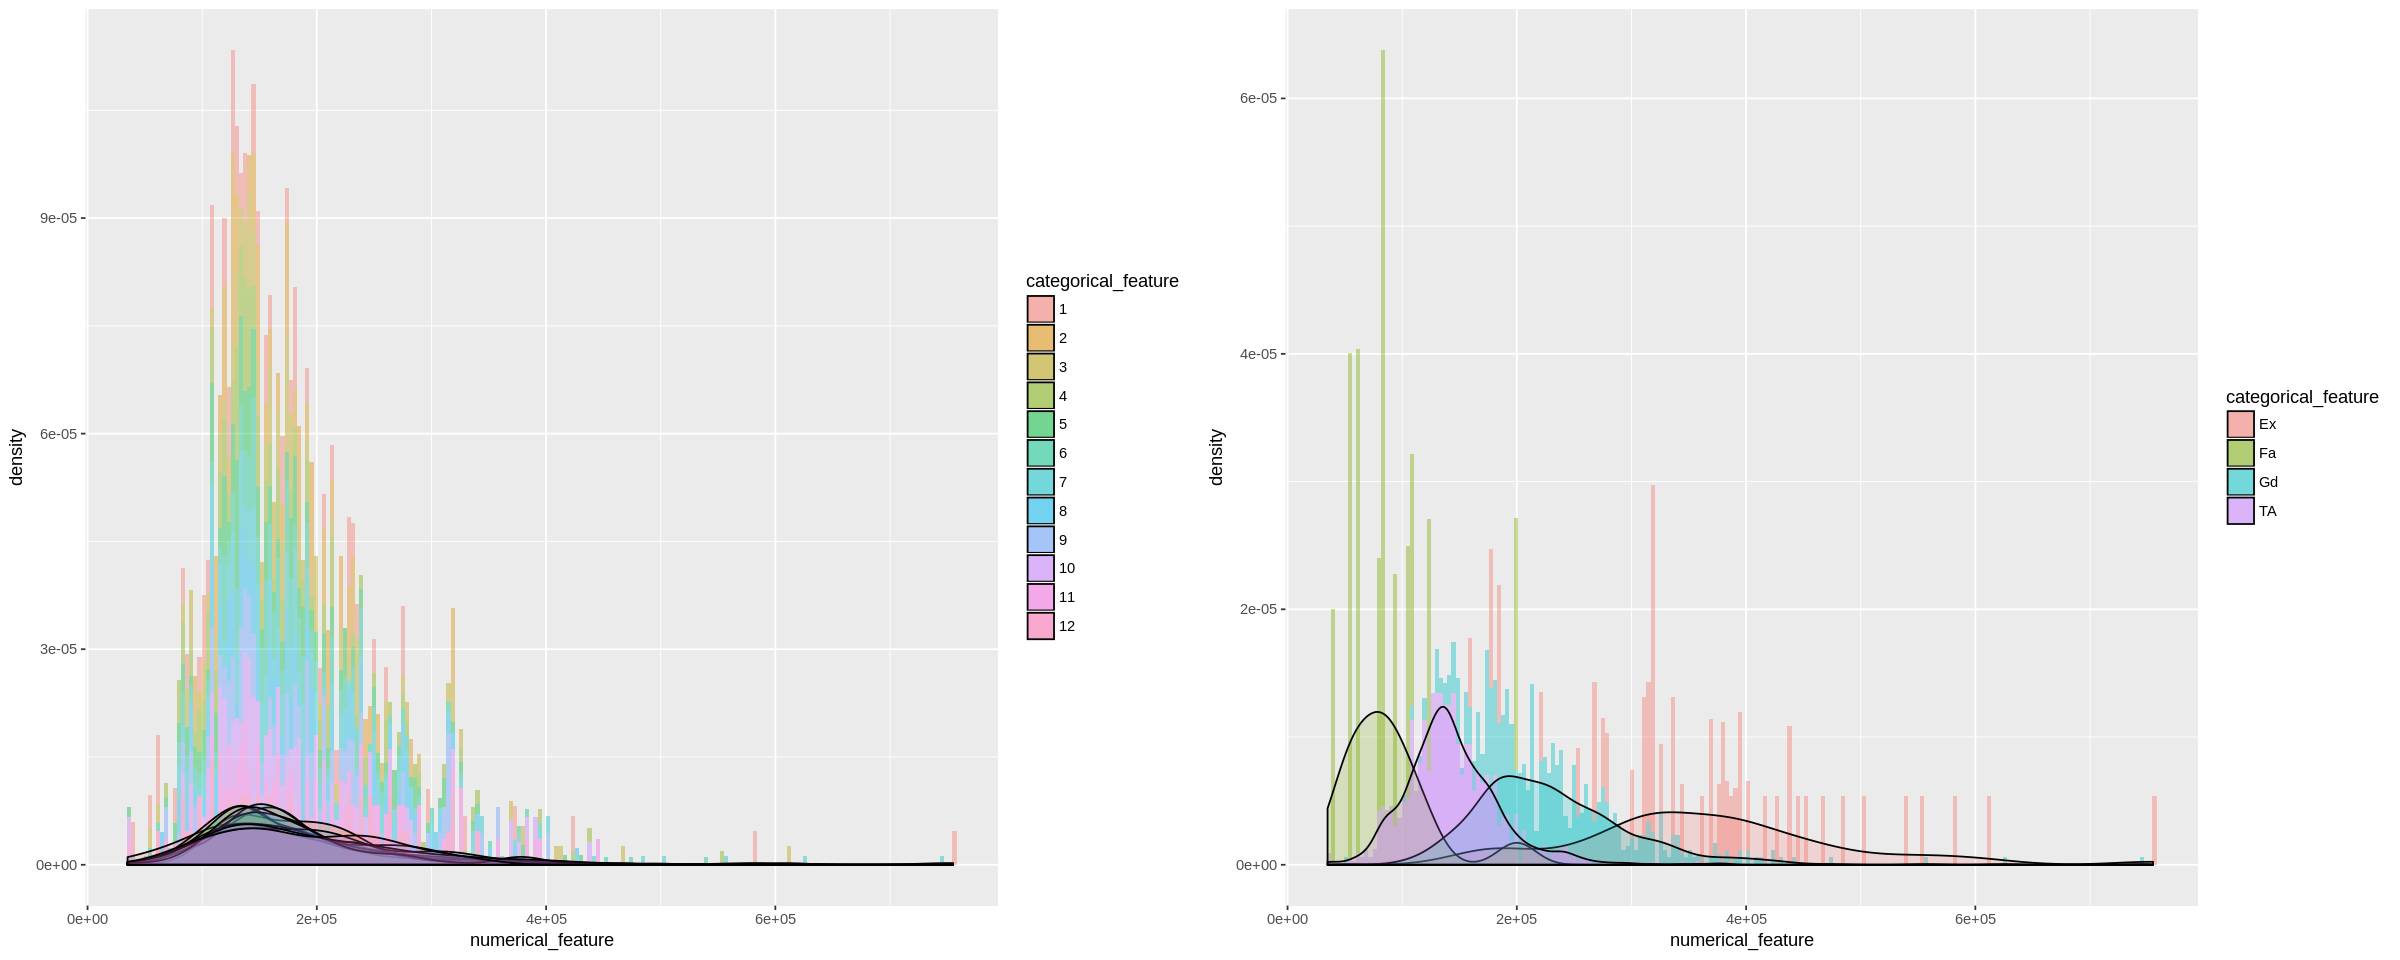

In [8]:
multiplot(hist_with_kde_numerical_by_category(SalePrice,MoSold),
          hist_with_kde_numerical_by_category(SalePrice,ExterQual), 
          cols = 2)

### Month Sold

Consider the null hypothesis:

$$H_0: \text{the mean responses is equal for all groups}$$

In [9]:
meansd = function(x) c(mean=mean(x), sd=sd(x))
by(SalePrice, MoSold, FUN=meansd)

MoSold: 1
    mean       sd 
183256.3 121381.1 
------------------------------------------------------------ 
MoSold: 2
     mean        sd 
177882.00  52960.86 
------------------------------------------------------------ 
MoSold: 3
     mean        sd 
182570.12  87143.86 
------------------------------------------------------------ 
MoSold: 4
     mean        sd 
171503.26  77147.32 
------------------------------------------------------------ 
MoSold: 5
     mean        sd 
171943.95  69013.79 
------------------------------------------------------------ 
MoSold: 6
     mean        sd 
177395.74  69453.09 
------------------------------------------------------------ 
MoSold: 7
     mean        sd 
186331.19  91772.13 
------------------------------------------------------------ 
MoSold: 8
     mean        sd 
184649.78  73520.42 
------------------------------------------------------------ 
MoSold: 9
     mean        sd 
191339.39  76281.58 
----------------------------------------

In [10]:
oneway.test(SalePrice ~ MoSold)


	One-way analysis of means (not assuming equal variances)

data:  SalePrice and MoSold
F = 0.90408, num df = 11.00, denom df = 405.31, p-value = 0.5364


### This test shows that we CAN NOT reject the null hypothesis

### Exterior Quality

Consider the null hypothesis:

$$H_0: \text{the mean responses is equal for all groups}$$

In [11]:
by(SalePrice, ExterQual, FUN=meansd)

ExterQual: Ex
    mean       sd 
365446.5 116729.7 
------------------------------------------------------------ 
ExterQual: Fa
    mean       sd 
87985.21 39826.92 
------------------------------------------------------------ 
ExterQual: Gd
     mean        sd 
232038.00  71595.41 
------------------------------------------------------------ 
ExterQual: TA
     mean        sd 
144315.72  42488.31 

In [12]:
oneway.test(SalePrice ~ ExterQual)


	One-way analysis of means (not assuming equal variances)

data:  SalePrice and ExterQual
F = 264.07, num df = 3.000, denom df = 52.093, p-value < 2.2e-16


### This test shows that we CAN reject the null hypothesis